In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression 
# para generar características polinómicas
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)

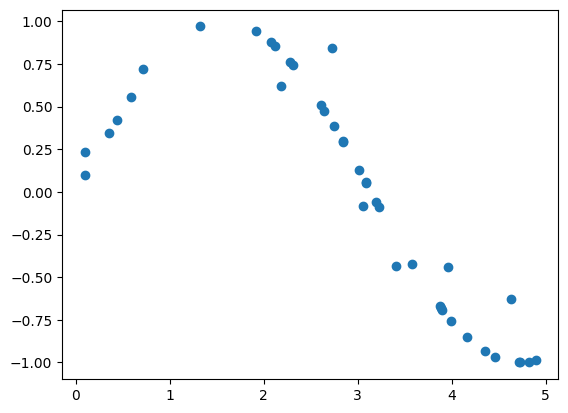

In [ ]:
np.random.seed(0)
x = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(x).ravel()

# Agregar ruido a los objetivos
y[::5] += 1 * (0.5 - np.random.rand(8))

plt.scatter(x,y)
plt.show()

In [ ]:
print(x.shape)
print(x.size)
x

(40, 1)
40


array([[0.093949  ],
       [0.10109199],
       [0.35518029],
       [0.4356465 ],
       [0.59137213],
       [0.71676644],
       [1.32277806],
       [1.91720759],
       [2.0733097 ],
       [2.118274  ],
       [2.18793606],
       [2.28075166],
       [2.30739681],
       [2.60924161],
       [2.6444746 ],
       [2.72441591],
       [2.74406752],
       [2.84022281],
       [2.84216974],
       [3.01381688],
       [3.06047861],
       [3.08466998],
       [3.08817749],
       [3.19960511],
       [3.22947057],
       [3.4091015 ],
       [3.57594683],
       [3.87116845],
       [3.89078375],
       [3.90264588],
       [3.95862519],
       [3.99579282],
       [4.16309923],
       [4.35006074],
       [4.458865  ],
       [4.62798319],
       [4.71874039],
       [4.72334459],
       [4.8183138 ],
       [4.89309171]])

In [ ]:
y

array([ 0.23430296,  0.10091989,  0.34775941,  0.4219966 ,  0.55750066,
        0.71991826,  0.96940081,  0.94059723,  0.87637482,  0.8538402 ,
        0.61790585,  0.75839099,  0.74075654,  0.50756044,  0.47689441,
        0.84495547,  0.38713765,  0.29682859,  0.29496884,  0.12742837,
       -0.08574159,  0.05689193,  0.05338977, -0.05797992, -0.08776485,
       -0.43496758, -0.42082464, -0.66655347, -0.68104667, -0.68968448,
       -0.43950071, -0.75404581, -0.85289554, -0.93507411, -0.96803456,
       -0.62536624, -0.99997983, -0.99993999, -0.99439521, -0.98371764])

In [ ]:
# class sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')
pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
X = pf.fit_transform(x.reshape(-1,1))  # transformamos la entrada en polinómica
print(X.shape)
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression

# instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X,y)
regresion_lineal.fit(X, y) 

# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))
# f(x)= -0.15.... + 1.93... *x + (-0.90..)*x**2 + 0.096...*x**3
# x1, x2, x3
# 1, x1, x1**2, x1**3
# 1, x2...
# 1, x3, ..
# grado 3 -» x1*x2*x3, x1**2 * x3, x1**2 * x2, x2**2 *x3, x3**2 * x1, x3**2 *x2, x2**2 * x1

(40, 4)
w = [ 0.          1.93278452 -0.90239874  0.09662748], b = -0.15312533295011985


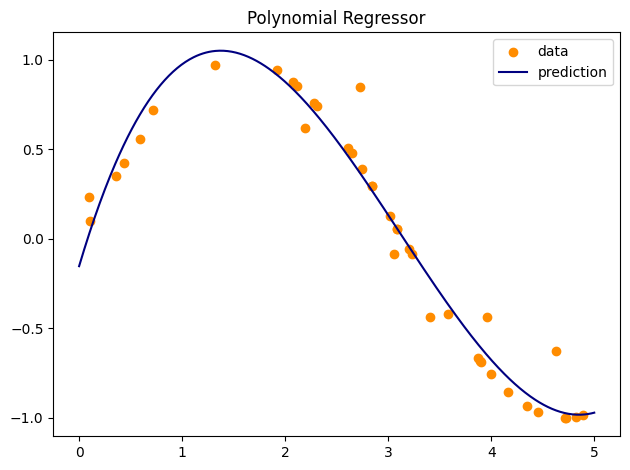

In [ ]:
plt.scatter(x, y, color="darkorange", label="data")
plt.plot(T, regresion_lineal.predict(pf.fit_transform(T)), color="navy", label="prediction")
plt.axis("tight")
plt.legend()
plt.title("Polynomial Regressor")
plt.tight_layout()
plt.show()


In [ ]:
# https://datascience.stackexchange.com/questions/42760/mad-vs-rmse-vs-mae-vs-msle-vs-r%c2%b2-when-to-use-which
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X)
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(X, y)
print('Coeficiente de Determinación R2 = ' + str(r2))

Error Cuadrático Medio (MSE) = 0.01588312488847119
Raíz del Error Cuadrático Medio (RMSE) = 0.12602827019550492
Coeficiente de Determinación R2 = 0.9625778400300979
